In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

In [30]:

col_name = ['sepal-lenght','petal-lenght','class']

In [33]:
dataset = pd.read_csv(url, names = col_name)

In [34]:
dataset.shape

(150, 3)

In [35]:
dataset.head()

,,sepal-lenght,petal-lenght,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 150 entries, (5.1, 3.5) to (5.9, 3.0)
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   petal-lenght  150 non-null    float64
 2   class         150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.9+ KB


In [37]:
dataset.describe()

,sepal-lenght,petal-lenght
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [38]:
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

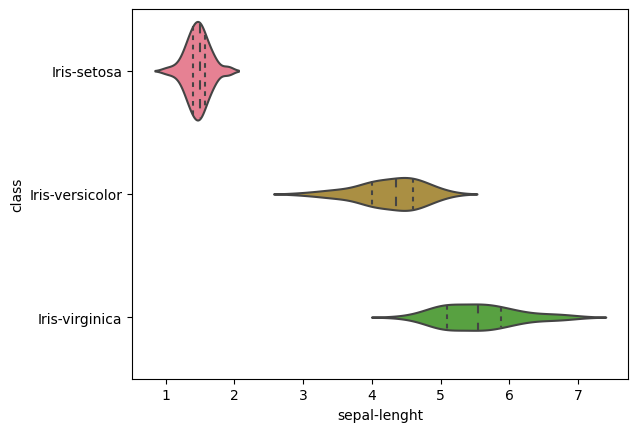

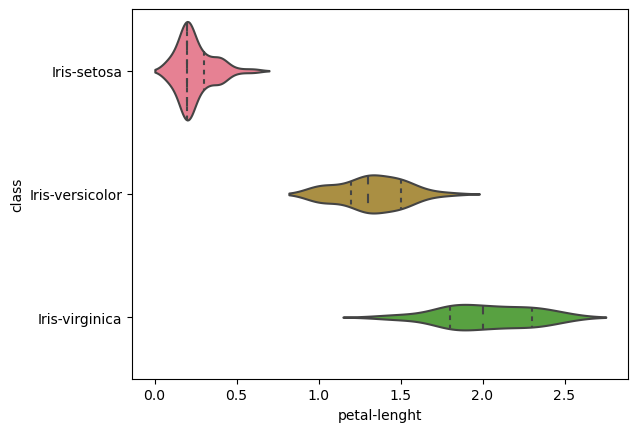

In [39]:
sns.violinplot(y='class', x='sepal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=dataset, inner='quartile')
plt.show()

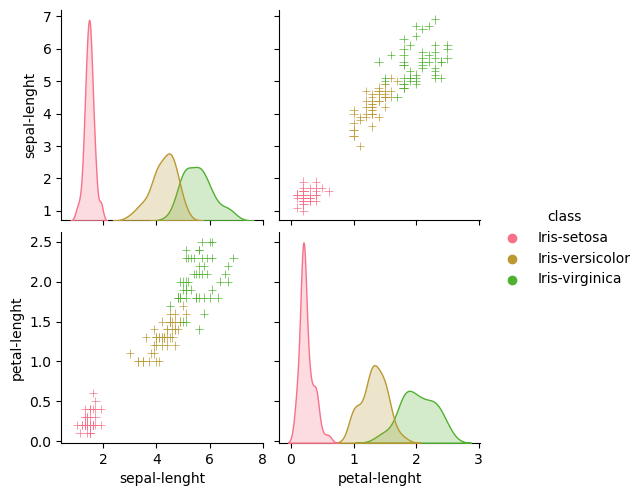

In [40]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

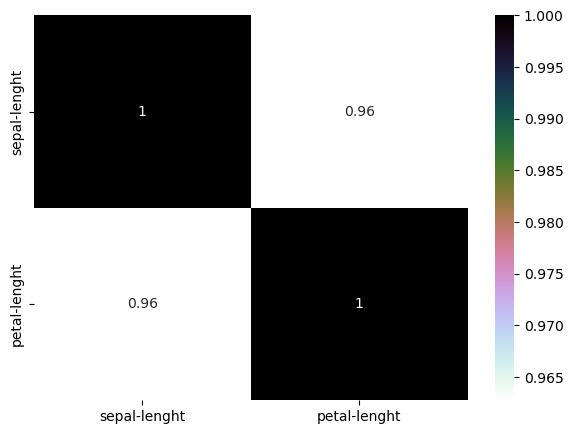

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='cubehelix_r')
plt.show()

In [42]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 2) | y shape: (150,) 


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define the list of models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# Evaluate each model
model_names = []
results = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.975000 (0.038188)
LDA: 0.950000 (0.040825)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.958333 (0.041667)
SVC: 0.975000 (0.038188)


In [45]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [46]:
accuracy_score(y_test, prediction)

0.9666666666666667

In [47]:
classification_report(y_test, prediction)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        11\nIris-versicolor       1.00      0.92      0.96        13\n Iris-virginica       0.86      1.00      0.92         6\n\n       accuracy                           0.97        30\n      macro avg       0.95      0.97      0.96        30\n   weighted avg       0.97      0.97      0.97        30\n'

In [50]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

